 Building a Generative Adversarial Network (GAN) using Keras to generate images of fashion items based on the Fashion MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

1. Use keras to download the fashion MNIST dataset directly.

In [ ]:
# Loading the Fashion MNIST dataset.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

2. Visualize 25 apparel from the train dataset.

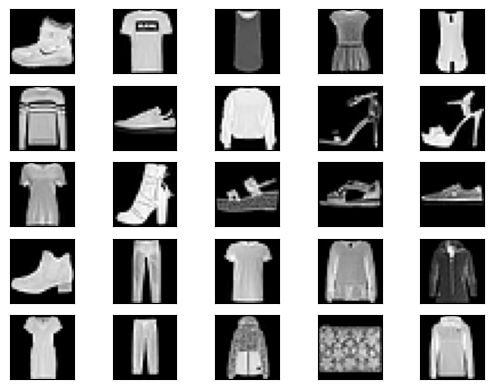

In [ ]:
# Visualizing the first 25 images from the training set.
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])

3.	Flatten and scale the train and test images.

In [ ]:
# Reshaping and normalizing the training and testing images.
X_train = X_train.reshape(-1, 784)
X_train = (X_train / 255 - 0.5) * 2
X_test  = X_test.reshape(-1, 784)
X_test  = (X_test / 255 - 0.5) * 2

4.	Build the generator and discriminator networks.

In [ ]:
# Function to create the GAN model, including both the generator and discriminator.
def make_simple_GAN(sample_size):
    generator = Sequential()
    generator.add(Input(shape=(sample_size,)))
    generator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    generator.add(Dense(784, activation ='tanh'))

    discriminator = Sequential()
    discriminator.add(Input(shape=(784,)))
    discriminator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    discriminator.add(Dense(1, activation ='sigmoid'))

    gan = Sequential([
        generator,
        discriminator])

    discriminator.compile(optimizer = Adam(learning_rate=0.001),
                          loss = 'binary_crossentropy')
    gan.compile(optimizer = Adam(learning_rate=0.0001),
                loss = 'binary_crossentropy')

    return gan, generator, discriminator

5.	Choose appropriate hyperparameters.

In [ ]:
# hyperparameters
sample_size     = 100
epochs          = 50
batch_size      = 64
eval_size       = 16
smooth          = 0.1

6.	Build the GAN network.

In [ ]:
# Building GAN network
def make_latent_samples(n_samples, sample_size):
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

# Labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# Create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(sample_size)

7.	Train the GAN network with at least 50 epochs.

1/1 [==============================] - 0s 40ms/step


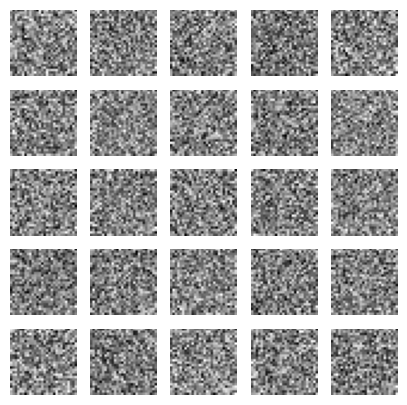

Epoch:   1/50 Discriminator Loss: 0.1095 Generator Loss: 3.6911
Epoch:   2/50 Discriminator Loss: 0.2292 Generator Loss: 5.0122
Epoch:   3/50 Discriminator Loss: 0.2069 Generator Loss: 4.6603
Epoch:   4/50 Discriminator Loss: 0.1747 Generator Loss: 2.8993
Epoch:   5/50 Discriminator Loss: 0.1657 Generator Loss: 2.8191
Epoch:   6/50 Discriminator Loss: 0.2203 Generator Loss: 2.5710
Epoch:   7/50 Discriminator Loss: 0.4721 Generator Loss: 2.2625
Epoch:   8/50 Discriminator Loss: 0.2314 Generator Loss: 2.1277
Epoch:   9/50 Discriminator Loss: 0.2512 Generator Loss: 3.4190
Epoch:  10/50 Discriminator Loss: 0.1938 Generator Loss: 3.8701
1/1 [==============================] - 0s 16ms/step


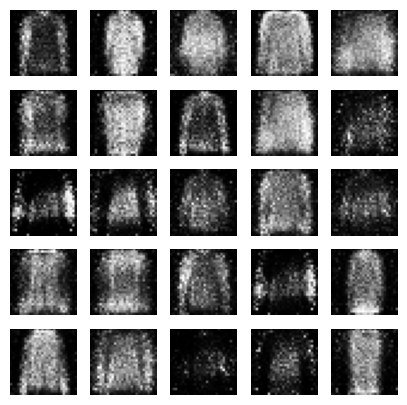

Epoch:  11/50 Discriminator Loss: 0.1467 Generator Loss: 2.9575
Epoch:  12/50 Discriminator Loss: 0.1770 Generator Loss: 2.7350
Epoch:  13/50 Discriminator Loss: 0.3500 Generator Loss: 4.0817
Epoch:  14/50 Discriminator Loss: 0.3034 Generator Loss: 3.0021
Epoch:  15/50 Discriminator Loss: 0.2982 Generator Loss: 2.8277
Epoch:  16/50 Discriminator Loss: 0.2516 Generator Loss: 3.4583
Epoch:  17/50 Discriminator Loss: 0.2915 Generator Loss: 3.3688
Epoch:  18/50 Discriminator Loss: 0.2161 Generator Loss: 2.7881
Epoch:  19/50 Discriminator Loss: 0.2322 Generator Loss: 2.5500
Epoch:  20/50 Discriminator Loss: 0.4458 Generator Loss: 2.1627
1/1 [==============================] - 0s 25ms/step


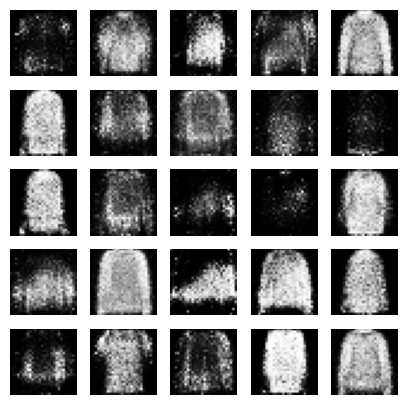

Epoch:  21/50 Discriminator Loss: 0.2583 Generator Loss: 2.8685
Epoch:  22/50 Discriminator Loss: 0.3028 Generator Loss: 2.5904
Epoch:  23/50 Discriminator Loss: 0.3870 Generator Loss: 2.4140
Epoch:  24/50 Discriminator Loss: 0.1223 Generator Loss: 3.9173
Epoch:  25/50 Discriminator Loss: 0.4398 Generator Loss: 2.9829
Epoch:  26/50 Discriminator Loss: 0.2565 Generator Loss: 3.9364
Epoch:  27/50 Discriminator Loss: 0.4114 Generator Loss: 2.8204
Epoch:  28/50 Discriminator Loss: 0.2533 Generator Loss: 3.3111
Epoch:  29/50 Discriminator Loss: 0.3584 Generator Loss: 2.8852
Epoch:  30/50 Discriminator Loss: 0.2499 Generator Loss: 2.6932
1/1 [==============================] - 0s 16ms/step


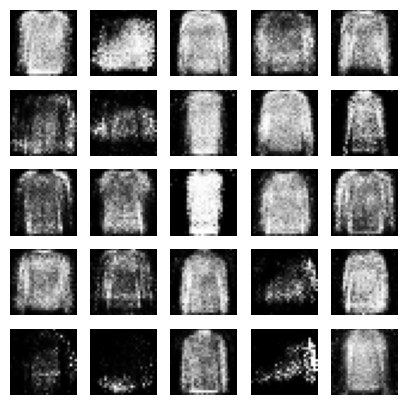

Epoch:  31/50 Discriminator Loss: 0.4043 Generator Loss: 3.3860
Epoch:  32/50 Discriminator Loss: 0.2693 Generator Loss: 3.7554
Epoch:  33/50 Discriminator Loss: 0.3499 Generator Loss: 2.6609
Epoch:  34/50 Discriminator Loss: 0.4552 Generator Loss: 3.9417
Epoch:  35/50 Discriminator Loss: 0.2778 Generator Loss: 3.1151
Epoch:  36/50 Discriminator Loss: 0.4385 Generator Loss: 3.6517
Epoch:  37/50 Discriminator Loss: 0.4271 Generator Loss: 3.0271
Epoch:  38/50 Discriminator Loss: 0.2156 Generator Loss: 4.3683
Epoch:  39/50 Discriminator Loss: 1.0874 Generator Loss: 2.7237
Epoch:  40/50 Discriminator Loss: 0.4969 Generator Loss: 3.5753
1/1 [==============================] - 0s 16ms/step


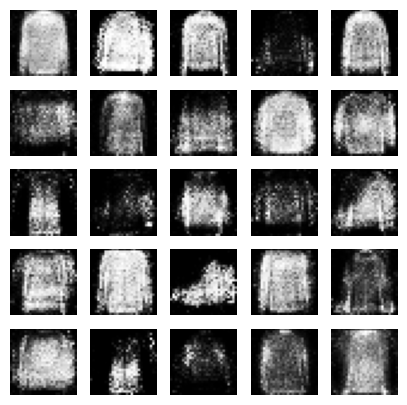

Epoch:  41/50 Discriminator Loss: 0.4305 Generator Loss: 3.0204
Epoch:  42/50 Discriminator Loss: 0.4442 Generator Loss: 2.2410
Epoch:  43/50 Discriminator Loss: 0.2487 Generator Loss: 2.8604
Epoch:  44/50 Discriminator Loss: 0.3931 Generator Loss: 2.8502
Epoch:  45/50 Discriminator Loss: 0.6601 Generator Loss: 2.5839
Epoch:  46/50 Discriminator Loss: 0.3378 Generator Loss: 2.9796
Epoch:  47/50 Discriminator Loss: 0.4424 Generator Loss: 2.9345
Epoch:  48/50 Discriminator Loss: 0.6072 Generator Loss: 3.4014
Epoch:  49/50 Discriminator Loss: 0.6289 Generator Loss: 2.2578
Epoch:  50/50 Discriminator Loss: 0.3501 Generator Loss: 2.9484


In [ ]:
losses = []
for e in range(epochs):
    if e % 10 == 0:  # Every 10 epochs
          latent_samples = make_latent_samples(25, sample_size)
          generated_digits = generator.predict(latent_samples)

          plt.figure(figsize=(5, 5))
          for i in range(25):
              img = generated_digits[i]
              img = (img / 2 + 0.5) * 255  # Rescale pixel values
              img = img.reshape(28, 28)    # Reshape flat array back to 28x28
              plt.subplot(5, 5, i + 1)
              plt.imshow(img, cmap='gray')
              plt.axis('off')
          plt.show()

    for i in range(len(X_train)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train[i*batch_size:(i+1)*batch_size]

        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)

        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)

        # Display generated digits during training to visualize improvement

    # evaluate
    X_eval_real = X_test[np.random.choice(len(X_test), eval_size, replace=False)]

    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss = d_loss + discriminator.test_on_batch(X_eval_fake, y_eval_fake)

    # The fake images are labeled a real to test if the discriminator can be fooled.
    g_loss = gan.test_on_batch(latent_samples, y_eval_real)

    losses.append((d_loss, g_loss))

    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

8.	Plot the loss curves for the discriminator and generator.

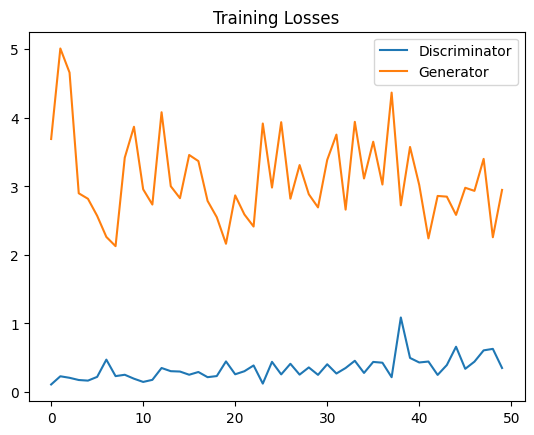

In [ ]:
# Plotting the training losses for both discriminator and generator.
losses = np.array(losses)

plt.plot(losses[:, 0], label='Discriminator')
plt.plot(losses[:, 1], label='Generator')
plt.title("Training Losses")
plt.legend()

9.	After the GAN is trained, generate and visualize 64 apparels.

2/2 [==============================] - 0s 4ms/step


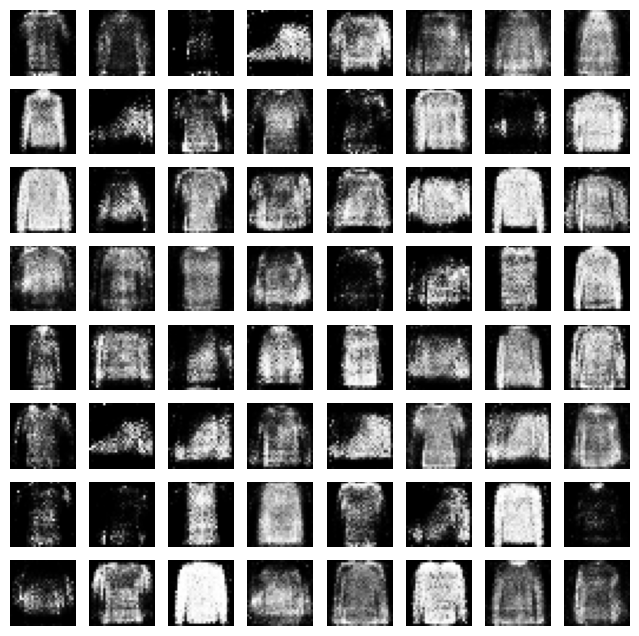

In [ ]:
# Generating 64 latent samples from the normal distribution
latent_samples = np.random.normal(0, 1, (64, sample_size))
generated_digits = generator.predict(latent_samples)

# Adjusting the figure size for better display
plt.figure(figsize=(8, 8))

# Looping to plot each of the 64 generated images
for i in range(64):
    img = generated_digits[i]
    img = (img / 2 + 0.5) * 255
    img = img.reshape(28, 28)
    plt.subplot(8, 8, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()